In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CleanedCrimeData.csv')

In [4]:
df.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,...,HOUR,STREET,Location,OCCURRED_ON_DATE.1,Unnamed: 20,Unnamed: 21,Temp_High,rain,snow,Temp_low
0,0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,...,13,LINCOLN ST,"(42.35779134, -71.13937053)",9/2/2018,1:00:00,PM,84.0,0,0,64.0
1,1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018,8,...,0,HECLA ST,"(42.30682138, -71.06030035)",8/21/2018,12:00:00,AM,72.0,0,0,64.9
2,2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018,9,...,19,CAZENOVE ST,"(42.34658879, -71.07242943)",9/3/2018,7:27:00,PM,96.1,0,0,73.0
3,3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018,9,...,21,NEWCOMB ST,"(42.33418175, -71.07866441)",9/3/2018,9:16:00,PM,96.1,0,0,73.0
4,4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018,9,...,21,DELHI ST,"(42.27536542, -71.09036101)",9/3/2018,9:05:00,PM,96.1,0,0,73.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255006 entries, 0 to 255005
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           255006 non-null  int64  
 1   INCIDENT_NUMBER      255006 non-null  object 
 2   OFFENSE_CODE         255006 non-null  int64  
 3   OFFENSE_CODE_GROUP   255006 non-null  object 
 4   OFFENSE_DESCRIPTION  255006 non-null  object 
 5   DISTRICT             253559 non-null  object 
 6   REPORTING_AREA       255006 non-null  object 
 7   SHOOTING             398 non-null     object 
 8   YEAR                 255006 non-null  int64  
 9   MONTH                255006 non-null  int64  
 10  DAY_OF_WEEK          255006 non-null  object 
 11  HOUR                 255006 non-null  int64  
 12  STREET               246846 non-null  object 
 13  Location             255006 non-null  object 
 14  OCCURRED_ON_DATE.1   255006 non-null  object 
 15  Unnamed: 20      

In [6]:
df2 = df[["Temp_High", 'rain', 'OCCURRED_ON_DATE.1']]
df2['Temp_High'] = df2['Temp_High'].round(-1)
df2.head(20)

C:\Users\19138\AppData\Local\Temp/ipykernel_29972/1708083190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Temp_High'] = df2['Temp_High'].round(-1)


,Temp_High,rain,OCCURRED_ON_DATE.1
0,80.0,0,9/2/2018
1,70.0,0,8/21/2018
2,100.0,0,9/3/2018
3,100.0,0,9/3/2018
4,100.0,0,9/3/2018
5,100.0,0,9/3/2018
6,100.0,0,9/3/2018
7,100.0,0,9/3/2018
8,100.0,0,9/3/2018
9,100.0,0,9/3/2018


In [7]:
df2['rain'] = pd.to_numeric(df['rain'], errors='coerce')

C:\Users\19138\AppData\Local\Temp/ipykernel_29972/3391857400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rain'] = pd.to_numeric(df['rain'], errors='coerce')


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255006 entries, 0 to 255005
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Temp_High           254788 non-null  float64
 1   rain                224973 non-null  float64
 2   OCCURRED_ON_DATE.1  255006 non-null  object 
dtypes: float64(2), object(1)
memory usage: 5.8+ MB


In [9]:
df2.drop_duplicates(subset="OCCURRED_ON_DATE.1", keep='first', inplace=True)

C:\Users\19138\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 245570
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temp_High           1176 non-null   float64
 1   rain                1040 non-null   float64
 2   OCCURRED_ON_DATE.1  1177 non-null   object 
dtypes: float64(2), object(1)
memory usage: 36.8+ KB


In [11]:
df2.head()

,Temp_High,rain,OCCURRED_ON_DATE.1
0,80.0,0.0,9/2/2018
1,70.0,0.0,8/21/2018
2,100.0,0.0,9/3/2018
38,70.0,0.0,9/1/2018
48,70.0,0.0,8/31/2018


In [12]:
df3 = df
df3['Date'] = df['OCCURRED_ON_DATE.1']
df3.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,...,STREET,Location,OCCURRED_ON_DATE.1,Unnamed: 20,Unnamed: 21,Temp_High,rain,snow,Temp_low,Date
0,0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,...,LINCOLN ST,"(42.35779134, -71.13937053)",9/2/2018,1:00:00,PM,84.0,0,0,64.0,9/2/2018
1,1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018,8,...,HECLA ST,"(42.30682138, -71.06030035)",8/21/2018,12:00:00,AM,72.0,0,0,64.9,8/21/2018
2,2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018,9,...,CAZENOVE ST,"(42.34658879, -71.07242943)",9/3/2018,7:27:00,PM,96.1,0,0,73.0,9/3/2018
3,3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018,9,...,NEWCOMB ST,"(42.33418175, -71.07866441)",9/3/2018,9:16:00,PM,96.1,0,0,73.0,9/3/2018
4,4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018,9,...,DELHI ST,"(42.27536542, -71.09036101)",9/3/2018,9:05:00,PM,96.1,0,0,73.0,9/3/2018


In [13]:
day = df.pivot_table(columns=['OCCURRED_ON_DATE.1'], aggfunc='size')
print(day)

OCCURRED_ON_DATE.1
1/1/2016     280
1/1/2017     209
1/1/2018     212
1/10/2016    157
1/10/2017    217
            ... 
9/8/2016     206
9/8/2017     285
9/9/2015     243
9/9/2016     236
9/9/2017     213
Length: 1177, dtype: int64


In [14]:
df4 = day.reset_index()
df4

,OCCURRED_ON_DATE.1,0
0,1/1/2016,280
1,1/1/2017,209
2,1/1/2018,212
3,1/10/2016,157
4,1/10/2017,217
...,...,...
1172,9/8/2016,206
1173,9/8/2017,285
1174,9/9/2015,243
1175,9/9/2016,236


In [15]:
df4.columns = ['date' , 'numCrimes']
df4

,date,numCrimes
0,1/1/2016,280
1,1/1/2017,209
2,1/1/2018,212
3,1/10/2016,157
4,1/10/2017,217
...,...,...
1172,9/8/2016,206
1173,9/8/2017,285
1174,9/9/2015,243
1175,9/9/2016,236


In [16]:
merge = pd.merge(df2, df4, left_on='OCCURRED_ON_DATE.1', right_on='date',)

In [17]:
merge

,Temp_High,rain,OCCURRED_ON_DATE.1,date,numCrimes
0,80.0,0.00,9/2/2018,9/2/2018,189
1,70.0,0.00,8/21/2018,8/21/2018,219
2,100.0,0.00,9/3/2018,9/3/2018,144
3,70.0,0.00,9/1/2018,9/1/2018,213
4,70.0,0.00,8/31/2018,8/31/2018,235
...,...,...,...,...,...
1172,80.0,0.14,7/18/2015,7/18/2015,191
1173,60.0,1.43,6/28/2015,6/28/2015,177
1174,80.0,NaN,7/26/2015,7/26/2015,155
1175,70.0,NaN,6/16/2015,6/16/2015,193


In [18]:
import numpy as np
data = merge.drop('OCCURRED_ON_DATE.1', axis=1)
data['numCrimes'] = data['numCrimes'].round(-1)
data.replace([np.inf, np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

data

,Temp_High,rain,date,numCrimes
0,80.0,0.00,9/2/2018,190
1,70.0,0.00,8/21/2018,220
2,100.0,0.00,9/3/2018,140
3,70.0,0.00,9/1/2018,210
4,70.0,0.00,8/31/2018,240
...,...,...,...,...
1170,80.0,0.00,8/5/2015,210
1171,90.0,0.00,8/2/2015,180
1172,80.0,0.14,7/18/2015,190
1173,60.0,1.43,6/28/2015,180


In [18]:
y = data["numCrimes"]
X = data.loc[:, ["Temp_High", 'rain']]

print("X:", X.shape)
print("Y:", y.shape)

X: (1040, 2)
Y: (1040,)


In [19]:
from sklearn import metrics

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=50, random_state=1)

In [43]:
from sklearn.linear_model  import LogisticRegression

logreg= LogisticRegression(solver='lbfgs', max_iter=100)

logreg.fit(X_train,y_train)

C:\Users\19138\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
from sklearn.metrics import accuracy_score

y_pred=logreg.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred))

0.2


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.24326923076923077


In [50]:
neighbors = list(range(1,50))

In [51]:
score = []

In [52]:
for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    preds_neighbors = clf.predict(X_test)
    score.append (accuracy_score(y_true = y_test, y_pred = preds_neighbors))

Text(0, 0.5, 'Testing accuracy')

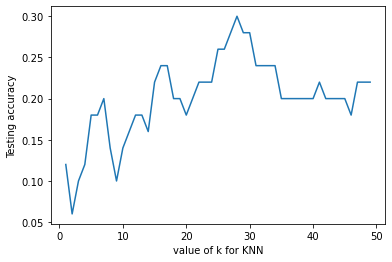

In [53]:
import matplotlib.pyplot as plt
plt.plot(neighbors, score)
plt.xlabel('value of k for KNN')
plt.ylabel('Testing accuracy')

In [32]:
from sklearn.model_selection import train_test_split
var_train, var_test, res_train, res_test = train_test_split(X, y, test_size = 500)


In [33]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(var_train, res_train)

In [34]:
from sklearn.metrics import accuracy_score
res_pred = decision_tree.predict(var_test)
score = accuracy_score(res_test, res_pred)

In [35]:
score

0.128